In [1]:
!pip install langgraph

  Obtaining dependency information for langgraph from https://files.pythonhosted.org/packages/6c/b5/c74644217180ca7d275179b0e0602cd433dc9d4cd40b304a6c0e62d4eb7b/langgraph-0.3.21-py3-none-any.whl.metadata
  Obtaining dependency information for langgraph-checkpoint<3.0.0,>=2.0.10 from https://files.pythonhosted.org/packages/ec/8d/e23bc15809c4a29e83efab34e7ff1ffb6dadac26b87aca98242ac6033934/langgraph_checkpoint-2.0.23-py3-none-any.whl.metadata
  Obtaining dependency information for langgraph-prebuilt<0.2,>=0.1.1 from https://files.pythonhosted.org/packages/52/c2/e88798e0c698ae92f30b41966a781e1b28fa48ae4825462062722d1942bb/langgraph_prebuilt-0.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for langgraph-sdk<0.2.0,>=0.1.42 from https://files.pythonhosted.org/packages/79/95/70f58cdf34a0f46131424ff16f1e3f52e196cbfc0802048475a7640f093e/langgraph_sdk-0.1.60-py3-none-any.whl.metadata
  Obtaining dependency information for xxhash<4.0.0,>=3.5.0 from https://files.pythonhosted.org

In [123]:
import os
os.environ["GOOGLE_API_KEY"] = 'Gemini Api Key'
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model='gemini-1.5-pro')

# Simple workflow of Langraph

In [3]:
def fun1(input1):
    return input1 +" From function 1 "

def fun2(input2):
    return input2 + " from function2"

In [30]:
from langgraph.graph import Graph

In [6]:
workflow = Graph()

# Creating Node

In [7]:
workflow.add_node("fun1", fun1)
workflow.add_node("fun2", fun2)

# Add Edges

In [8]:
workflow.add_edge('fun1', 'fun2')

# entry and exit point

In [9]:
workflow.set_entry_point('fun1')
workflow.set_finish_point('fun2')

# Compile the graph

In [10]:
app1 = workflow.compile()

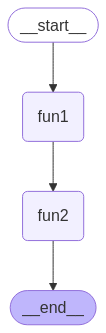

In [11]:
app1

In [12]:
app1.invoke("Hi I am kabir")

'Hi I am kabir From function 1  from function2'

In [15]:
input = "Hi I am kabir"

for output in app1.stream(input):
    for key, value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")
    

here is output from fun1
_______
Hi I am kabir From function 1 


here is output from fun2
_______
Hi I am kabir From function 1  from function2




# Now lets create workflow with llm 

In [17]:
def function3(query):
    res = llm.invoke(query).content
    return res

def function4(res):
    print(" --  hello --- ")
    return res.upper()

In [18]:
workflow_llm = Graph()

In [19]:
workflow_llm.add_node('fun3', function3)
workflow_llm.add_node('fun4', function4)
workflow_llm.add_edge('fun3', 'fun4')

In [20]:
workflow_llm.set_entry_point('fun3')

In [21]:
workflow_llm.set_finish_point('fun4')

In [22]:
app_llm = workflow_llm.compile()

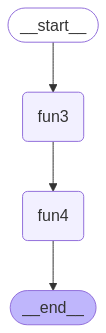

In [24]:
app_llm

In [25]:
app_llm.invoke("What is machine learning in one line")

 --  hello --- 


'MACHINE LEARNING IS TEACHING COMPUTERS TO LEARN FROM DATA WITHOUT EXPLICIT PROGRAMMING.\n'

# Token count

In [26]:
def function5(res):
    token = res.split()
    token_number = len(token)
    token_number = f" token number = {token_number}"
    return token_number

In [27]:
workflow_token = Graph()

In [28]:
workflow_token.add_node('llm', function3)
workflow_token.add_node('token_count', function5)

In [29]:
workflow_token.add_edge('llm', 'token_count')

In [30]:
workflow_token.set_entry_point('llm')
workflow_token.set_finish_point('token_count')

In [31]:
token_app = workflow_token.compile()

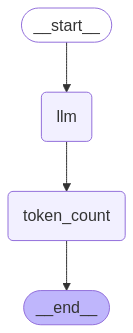

In [32]:
token_app

In [33]:
token_app.invoke("what is machine learning")

' token number = 381'

In [34]:
from langchain_community.tools.tavily_search import TavilySearchResults

In [38]:
os.environ['TAVILY_API_KEY'] = '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'

In [39]:
tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://langchain-ai.github.io/langgraph/concepts/low_level/',
  'content': 'In LangGraph, nodes are typically python functions (sync or async) where the first positional argument is the state, and (optionally), the second positional argument is a "config", containing optional configurable parameters (such as a thread_id).\nSimilar to NetworkX, you add these nodes to a graph using the add_node method:\n[](https://langchain-ai.github.io/langgraph/concepts/low_level/#__codelineno-7-1)from langchain_core.runnables import RunnableConfig [...] By composing Nodes and Edges, you can create complex, looping workflows that evolve the State over time. The real power, though, comes from how LangGraph manages that State. To emphasize: Nodes and Edges are nothing more than Python functions - they can contain an LLM or just good ol\' Python code.\nIn short: nodes do the work. edges tell what to do next. [...] Nodes: Python functions that encode the logic of your agents. They receive the cu

# embedding 

In [2]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

# list of libray or class 

In [4]:
from langchain_core.output_parsers import StrOutputParser
from langchain.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import TextLoader, DirectoryLoader
from langchain_community.vectorstores import FAISS

# load the data -> chunking -> embedding -> vectore store -> searching

In [5]:
loader = DirectoryLoader("data",glob="./*.txt",loader_cls=TextLoader)

In [6]:
docs = loader.load()

In [7]:
docs

[Document(metadata={'source': 'data\\srk.txt'}, page_content='"SRK" redirects here. For other uses, see SRK (disambiguation).\nFor the Indian cricketer, see Shahrukh Khan (cricketer).\nShah Rukh Khan\n\nKhan in 2018\nBorn\tShahrukh Khan\n2 November 1965 (age 59)\nNew Delhi, India\nAlma mater\tHansraj College (BA)\nOccupations\t\nActorfilm producertelevision personalitybusinessman\nYears active\t1988–present\nOrganisation(s)\tRed Chillies Entertainment\nKnight Riders Group\nWorks\tFull list\nSpouse\tGauri Khan \u200b(m. 1991)\u200b\nChildren\t3, including Aryan and Suhana\nAwards\tFull list\nHonours\tPadma Shri (2005)\nOrder of Arts and Letters (2007)\nLegion of Honour (2014)\nSignature\n\nShah Rukh Khan[a] (pronounced [ˈʃaːɦɾʊx xäːn] ⓘ; born 2 November 1965), also known by the initialism SRK, is an Indian actor and film producer who works in Hindi cinema. Referred to in the media as the "Baadshah of Bollywood" and "King Khan",[b] he has appeared in more than 100 films, and earned numer

In [8]:
text_spliter = RecursiveCharacterTextSplitter(chunk_size = 100, chunk_overlap = 50)

In [9]:
new_docs = text_spliter.split_documents(docs)

In [10]:
doc_string = [doc.page_content for doc in new_docs]

In [11]:
doc_string

['"SRK" redirects here. For other uses, see SRK (disambiguation).',
 'For the Indian cricketer, see Shahrukh Khan (cricketer).\nShah Rukh Khan',
 'Khan in 2018\nBorn\tShahrukh Khan\n2 November 1965 (age 59)\nNew Delhi, India',
 '2 November 1965 (age 59)\nNew Delhi, India\nAlma mater\tHansraj College (BA)\nOccupations',
 'Alma mater\tHansraj College (BA)\nOccupations\t\nActorfilm producertelevision personalitybusinessman',
 'Years active\t1988–present\nOrganisation(s)\tRed Chillies Entertainment\nKnight Riders Group',
 'Knight Riders Group\nWorks\tFull list\nSpouse\tGauri Khan \u200b(m. 1991)\u200b',
 'Works\tFull list\nSpouse\tGauri Khan \u200b(m. 1991)\u200b\nChildren\t3, including Aryan and Suhana',
 'Children\t3, including Aryan and Suhana\nAwards\tFull list\nHonours\tPadma Shri (2005)',
 'Awards\tFull list\nHonours\tPadma Shri (2005)\nOrder of Arts and Letters (2007)\nLegion of Honour (2014)',
 'Legion of Honour (2014)\nSignature',
 'Shah Rukh Khan[a] (pronounced [ˈʃaːɦɾʊx xäːn] ⓘ;

In [12]:
len(doc_string)

255

In [13]:
new_docs

[Document(metadata={'source': 'data\\srk.txt'}, page_content='"SRK" redirects here. For other uses, see SRK (disambiguation).'),
 Document(metadata={'source': 'data\\srk.txt'}, page_content='For the Indian cricketer, see Shahrukh Khan (cricketer).\nShah Rukh Khan'),
 Document(metadata={'source': 'data\\srk.txt'}, page_content='Khan in 2018\nBorn\tShahrukh Khan\n2 November 1965 (age 59)\nNew Delhi, India'),
 Document(metadata={'source': 'data\\srk.txt'}, page_content='2 November 1965 (age 59)\nNew Delhi, India\nAlma mater\tHansraj College (BA)\nOccupations'),
 Document(metadata={'source': 'data\\srk.txt'}, page_content='Alma mater\tHansraj College (BA)\nOccupations\t\nActorfilm producertelevision personalitybusinessman'),
 Document(metadata={'source': 'data\\srk.txt'}, page_content='Years active\t1988–present\nOrganisation(s)\tRed Chillies Entertainment\nKnight Riders Group'),
 Document(metadata={'source': 'data\\srk.txt'}, page_content='Knight Riders Group\nWorks\tFull list\nSpouse\tGa

In [3]:
from langchain.embeddings import CohereEmbeddings
import os

os.environ["COHERE_API_KEY"]='Cohere Api Key'
embeddings = CohereEmbeddings(user_agent="langchain")

C:\Users\KABIR\AppData\Local\Temp\ipykernel_17900\1169486258.py:5: LangChainDeprecationWarning: The class `CohereEmbeddings` was deprecated in LangChain 0.0.30 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-cohere package and should be used instead. To use it run `pip install -U :class:`~langchain-cohere` and import as `from :class:`~langchain_cohere import CohereEmbeddings``.
  embeddings = CohereEmbeddings(user_agent="langchain")


In [14]:
db = FAISS.from_documents(new_docs, embeddings)

In [15]:
retriever = db.as_retriever(search_kwargs={"k": 3})

In [16]:
query = "tell me abount Personal life of Shahrukh Khan"

res = retriever.get_relevant_documents(query)

C:\Users\KABIR\AppData\Local\Temp\ipykernel_17900\72114150.py:3: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  res = retriever.get_relevant_documents(query)


In [17]:
res

[Document(metadata={'source': 'data\\srk.txt'}, page_content='Personal life\nShah Rukh Khan standing beside his wife Gauri at a party in 2012'),
 Document(metadata={'source': 'data\\srk.txt'}, page_content='Shah Rukh Khan[a] (pronounced [ˈʃaːɦɾʊx xäːn] ⓘ; born 2 November 1965), also known by the'),
 Document(metadata={'source': 'data\\srk.txt'}, page_content='Works\tFull list\nSpouse\tGauri Khan \u200b(m. 1991)\u200b\nChildren\t3, including Aryan and Suhana')]

In [18]:
res = retriever.invoke(query)

In [19]:
res

[Document(metadata={'source': 'data\\srk.txt'}, page_content='Personal life\nShah Rukh Khan standing beside his wife Gauri at a party in 2012'),
 Document(metadata={'source': 'data\\srk.txt'}, page_content='Shah Rukh Khan[a] (pronounced [ˈʃaːɦɾʊx xäːn] ⓘ; born 2 November 1965), also known by the'),
 Document(metadata={'source': 'data\\srk.txt'}, page_content='Works\tFull list\nSpouse\tGauri Khan \u200b(m. 1991)\u200b\nChildren\t3, including Aryan and Suhana')]

In [20]:
res[0].metadata

{'source': 'data\\srk.txt'}

In [21]:
for doc in res:
    print(doc)

page_content='Personal life
Shah Rukh Khan standing beside his wife Gauri at a party in 2012' metadata={'source': 'data\\srk.txt'}
page_content='Shah Rukh Khan[a] (pronounced [ˈʃaːɦɾʊx xäːn] ⓘ; born 2 November 1965), also known by the' metadata={'source': 'data\\srk.txt'}
page_content='Works	Full list
Spouse	Gauri Khan ​(m. 1991)​
Children	3, including Aryan and Suhana' metadata={'source': 'data\\srk.txt'}


# Agent State 

In [22]:
agentState = {}

In [24]:
agentState['message'] = []
agentState['message'].append("hi hello")

In [25]:
agentState

{'message': ['hi hello']}

# first function 

In [27]:
def llm_fun(agentState):
    message = agentState['message']
    question = message[-1]
    
    chat_prompt = "Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    res = llm.invoke(chat_prompt)
    
    agentState['message'].append(res.content)
    return agentState

In [28]:
def rag_fun(agentState):
    message = agentState['message']
    question = message[0]
    
    template = """You are an AI assistant specializing in document retrieval. 
    Use ONLY the provided context to answer. If the context lacks an answer, reply: 
    "I don't know based on the provided document."

    Context:
    {context}

    User's Question:
    {question}

    Answer:"""
    
    
    prompt = ChatPromptTemplate.from_template(template)
    
    retrieval_chain = (
        {'context':retriever, 'question': RunnablePassthrough()}
        | prompt
        |llm
        |StrOutputParser()
    )
    
    result = retrieval_chain.invoke(question)
    return result

# add graph

In [31]:
rag_app = Graph()
rag_app.add_node('llm', llm_fun)
rag_app.add_node('rag', rag_fun)
rag_app.add_edge('llm', 'rag')
rag_app.set_entry_point('llm')
rag_app.set_finish_point('rag')
rag_app = rag_app.compile()

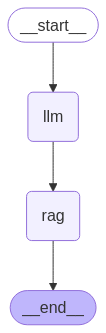

In [32]:
rag_app

In [33]:
rag_app.invoke({'message': ['tell me about personal life of Shahrukh Khan']})

'Shah Rukh Khan standing beside his wife Gauri at a party in 2012\n'

In [35]:
rag_app.invoke({'message': ['tell me about personal life of Ameer Khan']})

"I don't know based on the provided document.\n"

In [36]:
input = {'message': ['tell me about personal life of Shahrukh Khan']}

In [37]:
for output in rag_app.stream(input):
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'llm':
---
{'message': ['tell me about personal life of Shahrukh Khan', 'Married to Gauri Khan since 1991, with three children: Aryan, Suhana, and AbRam.  Resides primarily in Mumbai, at their home, Mannat.\n']}

---

Output from node 'rag':
---
Shah Rukh Khan standing beside his wife Gauri at a party in 2012


---



In [38]:
from typing import Annotated
from typing_extensions import Annotated  # For Python <3.9

PositiveInt = Annotated[int, "Must be a positive number"]

def process_age(age: PositiveInt):
    if age <= 0:
        raise ValueError("Age must be positive!")
    return f"Valid age: {age}"

# ✅ Correct Input
print(process_age(25))  # Output: "Valid age: 25"

# ❌ Incorrect Input
# print(process_age(-5))  # Raises ValueError: Age must be positive!


Valid age: 25


In [39]:
print(process_age(-5))

ValueError: Age must be positive!

In [40]:
from typing import Sequence

def sum_numbers(numbers: Sequence[int]) -> int:
    return sum(numbers)

# ✅ Works with a list
print(sum_numbers([1, 2, 3]))  # Output: 6

# ✅ Works with a tuple
print(sum_numbers((4, 5, 6)))  # Output: 15

# ❌ Incorrect usage (not a sequence)
# print(sum_numbers({1, 2, 3}))  # Type error in static checkers


6
15


In [44]:
 print(sum_numbers({1:"kabir", 2:"s", 3:"k"}))

6


In [45]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from langchain.prompts import PromptTemplate

In [46]:
class AgentState(TypedDict):
    # The 'messages' field should be a sequence of strings, and we annotate it with 'operator.add'
    # This implies we might want to "add" new messages to the sequence later
    messages: Annotated[Sequence[BaseMessage], operator.add]

In [48]:
from pydantic import BaseModel, Field

class TopicSelectionParser(BaseModel):
    Topic: str = Field(description='Selected Topic')
    Reasoning: str = Field(description='Reasoning behind topic selection')


from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [49]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


# graph function 

In [50]:
def agent_fun(state):
    message = state['messages']
    question = message[-1]
    print(question)
    
    template = """
    Your task is to classify the given user query into one of the following categories: [Sharukh Khan, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt = PromptTemplate(template=template,
                                    input_variables=[question],
                                    partial_variables={
                                        "format_instructions" : parser.get_format_instructions()                                    }
                                    )
    chain =  prompt | llm | parser
    
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })

    print(response)

    return {"messages": [response.Topic]}

In [52]:
state={"messages": ["Tell me about Sharukh Khan personal Life"]}
agent_fun(state)

Tell me about Sharukh Khan personal Life
Topic='Sharukh Khan' Reasoning="The query explicitly asks about Shahrukh Khan's personal life."


{'messages': ['Sharukh Khan']}

In [53]:
def llm_function_2(state):
    print('-> Calling LLM ->')

    messages = state['messages']
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Anwer the follow question with your knowledge of the real world. Following is the user question: " + question
    response = llm.invoke(complete_query)
    return {"messages": [response.content]}

In [54]:
def rag_function_2(state):
    print('-> Calling RAG ->')
    messages = state['messages']
    question = messages[0] ## Fetching the user question
    print(question)

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    
    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return  {"messages": [result]}

# conditional edge function

In [77]:
def router(state):
    print(" Router ->>> ")
    messages = state['messages']
    last_message = messages[-1]
    
    print(last_message)
    if 'Sharukh Khan' in last_message:
        return 'RAG Call'
    else:
        return 'LLM Call'
    

# Graph deefined

In [78]:
app_with_cond = Graph()

In [79]:
app_with_cond.add_node("LLM", llm_function_2)
app_with_cond.add_node("RAG", rag_function_2)
app_with_cond.add_node('agent', agent_fun)

app_with_cond.set_entry_point('agent')

app_with_cond.add_conditional_edges(
    "agent",
    router,{
        "RAG Call": "RAG",
        "LLM Call":"LLM"
        
    }
)

app_with_cond.set_finish_point("RAG")
app_with_cond.set_finish_point("LLM")

app_with_cond = app_with_cond.compile()



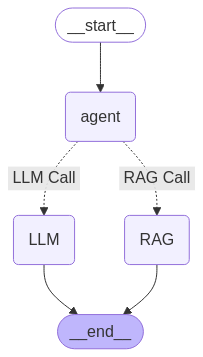

In [80]:
app_with_cond

In [81]:
inputs= {"messages": ["Tell me about Sharukh Khan"]}

In [82]:
ouput = app_with_cond.invoke(inputs)

Tell me about Sharukh Khan
Topic='Sharukh Khan' Reasoning='The query explicitly asks for information about Sharukh Khan.'
 Router ->>> 
Sharukh Khan
-> Calling RAG ->
Sharukh Khan
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [83]:
ouput

{'messages': ['Shah Rukh Khan (sometimes with the first name spelled "Shahrukh") is an Indian actor.  He prefers his full name, Shah Rukh Khan, rather than the shortened "Sharukh Khan". He was born on November 2, 1965.\n']}

# Making tool calling Agent

In [84]:
from langchain.tools import tool

@tool
def calculator(expression: str) -> str:
    """Evaluates a mathematical expression."""
    try:
        return str(eval(expression))
    except Exception as e:
        return f"Error: {e}"

In [89]:
!pip install --upgrade langgraph

In [99]:
@tool

def check_weather(location: str) -> str:
    '''Return the weather forecast for the specified location.'''
    return f"It's always sunny in {location}"

In [92]:
from langgraph.prebuilt import create_react_agent




In [94]:
llm

ChatGoogleGenerativeAI(model='models/gemini-1.5-pro', google_api_key=SecretStr('**********'), client=<google.ai.generativelanguage_v1beta.services.generative_service.client.GenerativeServiceClient object at 0x00000246BC337A50>, default_metadata=())

In [100]:
# ✅ Create the agent using create_react_agent
agent = create_react_agent(llm, [calculator, check_weather])  # Pass the list of tools

test_input = {"messages": [{"role": "user", "content": "What is 5 + 10?"}]}
print("Sending Input:", test_input)
response = agent.invoke(test_input)
print(response)


Sending Input: {'messages': [{'role': 'user', 'content': 'What is 5 + 10?'}]}
{'messages': [HumanMessage(content='What is 5 + 10?', additional_kwargs={}, response_metadata={}, id='5eb13caf-af9e-4727-a9b1-c77af1c7249b'), AIMessage(content='', additional_kwargs={'function_call': {'name': 'calculator', 'arguments': '{"expression": "5 + 10"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-cb4d72c5-c4bd-4d99-a6e6-3e3c4c842618-0', tool_calls=[{'name': 'calculator', 'args': {'expression': '5 + 10'}, 'id': 'f507c117-132b-4053-b0fa-8dd8a2628192', 'type': 'tool_call'}], usage_metadata={'input_tokens': 32, 'output_tokens': 7, 'total_tokens': 39, 'input_token_details': {'cache_read': 0}}), ToolMessage(content='15', name='calculator', id='6ee210f5-2762-4a59-bce8-ca7be67bf903', tool_call_id='f507c117-132b-4053-b0fa-8dd8a2628192'), AIMessage(content='15\n', additional_kwargs={}, response_metadata={'prompt_fee

In [101]:
# Extracting the final AIMessage
final_response = response["messages"][-1].content  # The last AIMessage usually contains the final response

print("Final Answer:", final_response)


Final Answer: 15



In [98]:
test_input = {"messages": [{"role": "user", "content": "What is Gen AI"}]}
print("Sending Input:", test_input)
response = agent.invoke(test_input)
print(response)


final_response = response["messages"][-1].content  # The last AIMessage usually contains the final response

print("Final Answer:", final_response)

Sending Input: {'messages': [{'role': 'user', 'content': 'What is Gen AI'}]}
{'messages': [HumanMessage(content='What is Gen AI', additional_kwargs={}, response_metadata={}, id='b132c0d0-f264-4529-8281-9b3e2ac8980a'), AIMessage(content='Generative AI, or GenAI, is a broad label for artificial intelligence systems capable of creating new content.  This content can span various formats, including text, images, audio, code, 3D models, videos, and more.  GenAI models achieve this by learning patterns and structures from existing data and then using this knowledge to generate similar yet novel outputs.\n\nWhile the term "GenAI" often refers to relatively recent models like large language models (LLMs) and diffusion models, the underlying concepts and some techniques have been around for decades.  However, advancements in computing power, data availability, and algorithms have significantly boosted the capabilities and accessibility of these models in recent years, leading to the current sur

In [102]:
test_input = {"messages": [{"role": "user", "content": "What is the weather of Kolkata"}]}
print("Sending Input:", test_input)
response = agent.invoke(test_input)
# print(response)


# Extracting the final AIMessage
final_response = response["messages"][-1].content  # The last AIMessage usually contains the final response

print("Final Answer:", final_response)

Sending Input: {'messages': [{'role': 'user', 'content': 'What is the weather of Kolkata'}]}
Final Answer: It's always sunny in Kolkata



In [105]:
response = agent.invoke({"messages": "What is 5 + 10?"})  # Use "contents" instead of "input"


In [108]:
response

{'messages': [HumanMessage(content='What is 5 + 10?', additional_kwargs={}, response_metadata={}, id='93465667-6e1d-40f7-bb72-fddd3cc502d3'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'calculator', 'arguments': '{"expression": "5 + 10"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': []}, id='run-018f5548-3bb2-49eb-bbf3-b721dad429f6-0', tool_calls=[{'name': 'calculator', 'args': {'expression': '5 + 10'}, 'id': '68d1d092-82bf-4d58-93a5-fcb5e0f82c79', 'type': 'tool_call'}], usage_metadata={'input_tokens': 32, 'output_tokens': 7, 'total_tokens': 39, 'input_token_details': {'cache_read': 0}}),
  ToolMessage(content='15', name='calculator', id='14860908-6da9-47da-bd5e-85c7c6c00e9c', tool_call_id='68d1d092-82bf-4d58-93a5-fcb5e0f82c79'),
  AIMessage(content='15\n', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STO

In [110]:
response["messages"][-1].content

'15\n'

In [112]:
weather_api = 'Your api key ' # https://www.weatherapi.com/ - create api key  from here

In [125]:
import requests

def get_weather(location):
    api_key = weather_api
    url = f"http://api.weatherapi.com/v1/current.json?key={api_key}&q={location}"
    response = requests.get(url)
    weather_data = response.json()
    return f"Current weather in {location}: {weather_data['current']['temp_c']}°C, {weather_data['current']['condition']['text']}"

# Fetch weather for a location
print(get_weather("New York"))


Current weather in New York: 21.7°C, Partly cloudy


In [114]:
import wikipedia

@tool
def search_wikipedia(query: str) -> str:
    """Searches Wikipedia for a given query and returns the summary."""
    try:
        return wikipedia.summary(query, sentences=2)
    except wikipedia.exceptions.DisambiguationError as e:
        return f"Multiple results found: {e.options[:3]}..."
    except wikipedia.exceptions.PageError:
        return "No Wikipedia page found."


In [115]:
search_wikipedia.invoke("Tell me about SRK")

'Shah Rukh Khan (pronounced [ˈʃaːɦɾʊx xäːn] ; born 2 November 1965), also known by the initialism SRK, is an Indian actor and film producer who works in Hindi cinema. Referred to in the media as the "Baadshah of Bollywood" and "King Khan", he has appeared in more than 100 films, and earned numerous accolades, including 14 Filmfare Awards.'

In [121]:
import os

os.environ["COHERE_API_KEY"]='QdWMbWNWgMbj4UpVyM5lSR5nFr1PIL0SoBrZ4XP3'
from langchain.llms import Cohere

llm = Cohere()

C:\Users\KABIR\AppData\Local\Temp\ipykernel_17900\2376240304.py:6: LangChainDeprecationWarning: The class `Cohere` was deprecated in LangChain 0.1.14 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-cohere package and should be used instead. To use it run `pip install -U :class:`~langchain-cohere` and import as `from :class:`~langchain_cohere import Cohere``.
  llm = Cohere()


# tools add 

In [133]:
import requests
import wikipedia
from langchain_core.tools import tool
from langgraph.prebuilt import create_react_agent


# Tool 1: Weather Fetcher
@tool
def get_weather(location: str) -> str:
    """Fetches real-time weather for a given location using the WeatherAPI."""
    api_key = weather_api  # Replace with your free WeatherAPI key
    url = f"http://api.weatherapi.com/v1/current.json?key={api_key}&q={location}"
    response = requests.get(url)
    weather_data = response.json()
    # Extract relevant weather info
    if "current" in weather_data:
        temp = weather_data['current']['temp_c']
        condition = weather_data['current']['condition']['text']
        return f"Current weather in {location}: {temp}°C, {condition}"
    else:
        return "Sorry, I couldn't fetch the weather data."

# Tool 2: Wikipedia Searcher
@tool
def search_wikipedia(query: str) -> str:
    """Searches Wikipedia for a given query and returns a short summary."""
    try:
        return wikipedia.summary(query, sentences=2)
    except wikipedia.exceptions.DisambiguationError as e:
        return f"Multiple results found: {e.options[:3]}..."
    except wikipedia.exceptions.PageError:
        return "No Wikipedia page found for the query."



# Create ReAct Agent with the Weather and Wikipedia tools
agent = create_react_agent(llm, [get_weather, search_wikipedia])

# Example function to invoke the agent
def invoke_agent(query):
    response = agent.invoke({"messages": [{"role": "user", "content": query}]})
    final_response = response["messages"][-1].content
    print("🤖 Agent Response:", final_response)

# Example Usage
if __name__ == "__main__":
    # Test 1: Weather query
    print("Weather Query:")
    invoke_agent("What's the weather in New York?")  # You can replace "New York" with any city
    
    # Test 2: Wikipedia query
    print("\nWikipedia Query:")
    invoke_agent("Who is Albert Einstein?")


Weather Query:


Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 39
}
].


ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.dev/gemini-api/docs/rate-limits"
}
, retry_delay {
  seconds: 37
}
]